<p style="font-family: Arial; font-size:4.05em; color:darkblue; font-style:bold"><br>
Intelligent Data Analysis</p><br>

## Part II Preprocessing

Pavol Grofčík  
Dennis Sobolev

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import math
import json as js
import seaborn as sns
import scipy.stats as stats
import re
from sklearn import neighbors
warnings.simplefilter(action='ignore', category=FutureWarning)

%matplotlib inline

<p style="font-family: Arial; font-size:2.95em; color:purple; font-style:bold"><br>
Content</p><br>

## Sections
Analysis of each train dataset is divided into sections, shown below
* __Introduction__
* __Reading Datasets__
* __Preprocessing__
* __Conclusion__



## Introduction

In this Notebook, our primary goal is to **preprocess datasets** using various methods to do 
> __Merging Datasets__  
> __Removing duplicates__  
> __Date normalization__  
> __Parsing JSON__  
> __Dealing with missing NaN values__   
> __Normalization outliers__ 

### Enough words. So let's do preprocessing!

## Reading Datasets

In [2]:
#Reading the dataset file and loading it into work environment. First brief look on the beginning of datasets.
df_personal = pd.read_csv("Datasets/personal_train.csv", index_col=0)
df_personal.head()

,name,address,age,sex,date_of_birth
0,Terry Terry,"11818 Lori Crossing Apt. 802\r\nPughstad, DC 7...",68.0,M,1949-11-16
1,Edith Boudreaux,"PSC 4657, Box 5446\r\nAPO AP 58412",75.0,F,1943-08-10
2,Stephen Lalk,Unit 9759 Box 9470\r\nDPO AP 45549,67.0,M,1951-05-28
3,Abraham Bruce,"137 Lewis Flat Suite 762\r\nWest Elizabeth, AL...",34.0,?,1984-02-13
4,Janet Washington,"995 Frank Stravenue\r\nSouth Matthewport, TX 8...",65.0,F,1953/06/24


In [3]:
df_other = pd.read_csv("Datasets/other_train.csv", index_col = 0)
df_other.head()

,name,address,query hyperthyroid,FTI measured,education,lithium,TT4,T4U,capital-loss,capital-gain,...,hypopituitary,medical_info,on antithyroid medication,referral source,education-num,occupation,TBG measured,TBG,race,FTI
0,John Kasprzak,"3856 Kayla Track\r\nLake Sara, HI 31241",f,t,HS-grad,f,118.0,1.42,0.0,0.0,...,f,"{'query hypothyroid':'f','T4U measured':'t','p...",f,other,9.0,Craft-repair,f,?,White,83
1,Stephen Harvey,"34782 Kayla Field\r\nSarahmouth, VT 75984",f,t,HS-grad,f,112.0,1.03,0.0,0.0,...,f,"{'query hypothyroid':'f','T4U measured':'t','p...",FALSE,other,-900.0,Adm-clerical,f,?,White,109
2,Paul Moe,USNV Mooney\r\nFPO AE 29375,f,t,Some-college,f,87.0,0.96,0.0,0.0,...,f,"{'query hypothyroid':'f','T4U measured':'t','p...",f,SVI,10.0,Other-service,f,?,White,90
3,Sarah Johnson,"3633 Bryan Isle\r\nNorth Jamesshire, HI 69484",f,t,Doctorate,f,102.0,0.85,0.0,0.0,...,f,"{'query hypothyroid':'t','T4U measured':'t','p...",f,SVI,16.0,Prof-specialty,f,?,White,119
4,Stacy Martinson,65701 Choi Course Apt. 280\r\nNorth Williamton...,f,t,Some-college,f,129.0,0.97,0.0,0.0,...,f,"{'query hypothyroid':'f','T4U measured':'t','p...",F,SVI,10.0,Other-service,f,?,White,133


## Merging datasets

We used pandas built in function **Merge** 

The priciple how me merged both datasets is based on **name** and **address** column using *inner* JOIN  
Also we sorted it according the columns to deal with potential duplicates

In [4]:
#Merging Datasets
df_new = pd.merge(df_personal, df_other, on=["name", "address"], how="inner", sort = True, copy = True)

In [5]:
df_new.head()

,name,address,age,sex,date_of_birth,query hyperthyroid,FTI measured,education,lithium,TT4,...,hypopituitary,medical_info,on antithyroid medication,referral source,education-num,occupation,TBG measured,TBG,race,FTI
0,Aaron Johansen,"744 Sandoval Causeway\r\nEast Robertburgh, NC ...",59.0,M,1959-08-05,f,t,Assoc-acdm,f,118.0,...,f,"{'query hypothyroid':'f','T4U measured':'t','p...",f,SVHC,12.0,Craft-repair,f,?,White,129
1,Abigail Martinez,"59351 Craig Courts\r\nGordonbury, WI 53797",18.0,F,99-12-09,f,t,Bachelors,f,143.0,...,f,"{'query hypothyroid':'f','T4U measured':'t','p...",f,other,13.0,Exec-managerial,f,?,Black,108
2,Abraham Bruce,"137 Lewis Flat Suite 762\r\nWest Elizabeth, AL...",34.0,?,1984-02-13,f,t,HS-grad,f,95.0,...,f,"{'query hypothyroid':'f','T4U measured':'t','p...",f,STMW,9.0,Sales,f,?,White,96
3,Abraham Hicks,"031 Wood Wall Apt. 152\r\nVictorburgh, CA 40253",29.0,M,1989-10-04,f,t,Bachelors,f,135.0,...,f,"{'query hypothyroid':'f','T4U measured':'t','p...",f,other,13.0,Adm-clerical,f,?,White,157
4,Ada Jeffries,"66827 Ortiz Radial\r\nWest Justin, IL 04779",70.0,F,48-04-24,f,t,Some-college,f,122.0,...,f,"{'query hypothyroid':'f','T4U measured':'t','p...",f,SVI,10.0,Other-service,f,?,Black,144


In [6]:
#Showing the count of rows for each column in the merged dataset
#We can see there are many Nan values
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2287 entries, 0 to 2286
Data columns (total 36 columns):
name                         2287 non-null object
address                      2287 non-null object
age                          2286 non-null float64
sex                          2287 non-null object
date_of_birth                2286 non-null object
query hyperthyroid           2277 non-null object
FTI measured                 2278 non-null object
education                    2280 non-null object
lithium                      2277 non-null object
TT4                          2125 non-null float64
T4U                          2042 non-null float64
capital-loss                 2049 non-null float64
capital-gain                 2282 non-null float64
tumor                        2277 non-null object
TSH                          2040 non-null float64
T3                           1805 non-null float64
fnlwgt                       2279 non-null float64
hours-per-week               2278 n

## Removing duplicates

The way of getting rid of duplicates can be very important, because some of duplicates can **contain specific data** that are not the same as in all duplicates rows.  
So our suggested approach is to check column in duplicates that contain Nan values and **fill it using other duplicates** .  It can be very time expensive, but for every cons there are pros, and by the way our dataset is not so big.

In [7]:
#Let's have a look at one duplicate
df_new[df_new["name"] == "Flora Jackson"].head()

,name,address,age,sex,date_of_birth,query hyperthyroid,FTI measured,education,lithium,TT4,...,hypopituitary,medical_info,on antithyroid medication,referral source,education-num,occupation,TBG measured,TBG,race,FTI
754,Flora Jackson,"4798 Carter Turnpike\r\nJosemouth, WV 19340",39.0,F,1979-02-26 00 00 00,t,t,HS-grad,f,84.0,...,NaN,"{'query hypothyroid':'f','T4U measured':'t','p...",f,other,9.0,Adm-clerical,f,?,White,85
755,Flora Jackson,"4798 Carter Turnpike\r\nJosemouth, WV 19340",39.0,F,1979-02-26 00 00 00,t,t,HS-grad,f,84.0,...,f,"{'query hypothyroid':'f','T4U measured':'t','p...",NaN,other,9.0,Adm-clerical,NaN,?,White,85


We have created a **mask** that has boolean value if the row is or is not duplicate. You may ask why we sort new merged dataset and voila this is why. Pandas function duplicated needs to have **sorted dataset** to find duplicates using specifif subset of columns  

In [8]:
#Masking name and address column as subset
mask = df_new.duplicated(subset=["name", "address"])

In [9]:
mask[:10]

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
dtype: bool

In [10]:
#The we assign all found duplicates
duplicates = df_new[mask == True]

In [11]:
print("Number of duplicates: %d" % (len(duplicates)))

Number of duplicates: 50


In [12]:
#The we determine index of duplicates
indexes = duplicates.index
print("Number of duplicates: %d, Number of indexes %d" % (len(duplicates), len(indexes)))

Number of duplicates: 50, Number of indexes 50


In [13]:
duplicates.head()

,name,address,age,sex,date_of_birth,query hyperthyroid,FTI measured,education,lithium,TT4,...,hypopituitary,medical_info,on antithyroid medication,referral source,education-num,occupation,TBG measured,TBG,race,FTI
44,Alice Stein,"910 Peterson Flats Suite 519\r\nSouth Donald, ...",27.0,F,1991-02-25 00 00 00,f,t,Some-college,f,272.0,...,f,"{'query hypothyroid':'f','T4U measured':'t','p...",F,other,10.0,Sales,f,?,Black,NaN
101,Angelica Dowd,"990 Dana Plaza Apt. 875\r\nLake Maryberg, AZ 7...",20.0,F,1998-02-28 00 00 00,f,t,HS-grad,f,93.0,...,NaN,"{'query hypothyroid':'f','T4U measured':'t','p...",t,other,9.0,Adm-clerical,f,?,White,93
110,Ann Hernandez,"87511 Raven Falls Apt. 369\r\nNew Brian, AZ 19649",34.0,F,1984-09-05,f,t,Bachelors,f,96.0,...,f,NaN,NaN,other,-1300.0,Adm-clerical,f,NaN,Black,90
162,Arlene Smith,"574 Shelton Loop\r\nEast Nicholas, KY 33054",40.0,F,1978-04-20 00 00 00,f,t,NaN,f,112.0,...,f,"{'query hypothyroid':'f','T4U measured':'t','p...",f,SVI,9.0,Prof-specialty,f,?,Black,90
309,Carmela Respress,"656 Stevenson Springs\r\nLake Audreyview, MO 0...",68.0,F,1950-01-22,f,NaN,Some-college,f,NaN,...,f,"{'query hypothyroid':'f','T4U measured':'t','p...",F,SVI,10.0,Other-service,f,?,White,113


In [14]:
#As we can see there is a duplicate with name "Flora Jackson"
duplicates[duplicates["name"] == "Flora Jackson"]

,name,address,age,sex,date_of_birth,query hyperthyroid,FTI measured,education,lithium,TT4,...,hypopituitary,medical_info,on antithyroid medication,referral source,education-num,occupation,TBG measured,TBG,race,FTI
755,Flora Jackson,"4798 Carter Turnpike\r\nJosemouth, WV 19340",39.0,F,1979-02-26 00 00 00,t,t,HS-grad,f,84.0,...,f,"{'query hypothyroid':'f','T4U measured':'t','p...",NaN,other,9.0,Adm-clerical,NaN,?,White,85


In [15]:
#Here is a function that gets rid off duplicates and keeps data for missing values from other duplicates
def fill_from_duplicates(df, duplicates, indexes):
    """ This is function that get rid off duplicates in 
        dataframe df on indices indexes
    """
    #indexes = duplicates.indexes
    #mask = df_new.duplicated(subset=["name", "address"])
    #duplicates = df[mask == True]
    
    indexes = indexes.tolist()
    
    #Iterating row by row
    for i in range(0, len(df)):
        if((i+1) == indexes[0]):
            
           #For Nan column we search over all duplicates to fill proper value
            for col in df.columns:
                if (pd.isnull(df.at[i,col]) or df.at[i,col] == "?"):
                    df.at[i,col] = df.at[i+1,col]
            
            indexes.pop(0)
            
            #Then we drop the duplicated row
            df.drop(i+1, inplace = True)
            if(len(indexes) == 0):
                #At the end we reset index
                df_new.reset_index(drop=True,inplace=True)
                print("Done")
                break

In [16]:
#Now we have all ready to deduplicated records in dataframe
fill_from_duplicates(df_new, duplicates, indexes)

Done


After the finished process of deduplication let's have a look at the record for a control

In [17]:
df_new[df_new["name"] == "Flora Jackson"]

,name,address,age,sex,date_of_birth,query hyperthyroid,FTI measured,education,lithium,TT4,...,hypopituitary,medical_info,on antithyroid medication,referral source,education-num,occupation,TBG measured,TBG,race,FTI
741,Flora Jackson,"4798 Carter Turnpike\r\nJosemouth, WV 19340",39.0,F,1979-02-26 00 00 00,t,t,HS-grad,f,84.0,...,f,"{'query hypothyroid':'f','T4U measured':'t','p...",f,other,9.0,Adm-clerical,f,?,White,85


## Date normalization

As you have certainly noticed there are many different formats for date of birth.  In this step we normalize it on one format. 

In [18]:
df_new["date_of_birth"].head()

0    1959-08-05
1      99-12-09
2    1984-02-13
3    1989-10-04
4      48-04-24
Name: date_of_birth, dtype: object

In [19]:
#Here is a simle function that normalize it on format as follows
def format_date(date):
    if not isinstance(date, str):
        return date
    date=date.split(' ', 1)[0]
    x=re.findall(r"[\w']+", date)
    for i in x:
        year=0
        day=0
        if int(i)>31:
            year=x.index(i)
        elif int(i)>12:
            day=x.index(i)
        if year==2:
            x[0], x[2] = x[2],x[0]
        date='-'.join(x)
    return date

df_new['date_of_birth']=df_new['date_of_birth'].apply(lambda x: format_date(x))
df_new.head()

,name,address,age,sex,date_of_birth,query hyperthyroid,FTI measured,education,lithium,TT4,...,hypopituitary,medical_info,on antithyroid medication,referral source,education-num,occupation,TBG measured,TBG,race,FTI
0,Aaron Johansen,"744 Sandoval Causeway\r\nEast Robertburgh, NC ...",59.0,M,1959-08-05,f,t,Assoc-acdm,f,118.0,...,f,"{'query hypothyroid':'f','T4U measured':'t','p...",f,SVHC,12.0,Craft-repair,f,?,White,129
1,Abigail Martinez,"59351 Craig Courts\r\nGordonbury, WI 53797",18.0,F,99-12-09,f,t,Bachelors,f,143.0,...,f,"{'query hypothyroid':'f','T4U measured':'t','p...",f,other,13.0,Exec-managerial,f,?,Black,108
2,Abraham Bruce,"137 Lewis Flat Suite 762\r\nWest Elizabeth, AL...",34.0,?,1984-02-13,f,t,HS-grad,f,95.0,...,f,"{'query hypothyroid':'f','T4U measured':'t','p...",f,STMW,9.0,Sales,f,?,White,96
3,Abraham Hicks,"031 Wood Wall Apt. 152\r\nVictorburgh, CA 40253",29.0,M,1989-10-04,f,t,Bachelors,f,135.0,...,f,"{'query hypothyroid':'f','T4U measured':'t','p...",f,other,13.0,Adm-clerical,f,?,White,157
4,Ada Jeffries,"66827 Ortiz Radial\r\nWest Justin, IL 04779",70.0,F,48-04-24,f,t,Some-college,f,122.0,...,f,"{'query hypothyroid':'f','T4U measured':'t','p...",f,SVI,10.0,Other-service,f,?,Black,144


In [20]:
#But we did not replace values of type xx-yy--zz, because we weren' sure if it in 19's or which years...
#All other format are normalized on type YYYY-MM-DD
df_new["date_of_birth"].head()

0    1959-08-05
1      99-12-09
2    1984-02-13
3    1989-10-04
4      48-04-24
Name: date_of_birth, dtype: object

## Parsing JSON 

In dataset there is a JSON format in the column **medical_info**. Morover, this JSON holds some **new information**, so we needeed to parse and add this new information as new columns

In [21]:
#One example of spoken JSON format
df_new["medical_info"][0]

"{'query hypothyroid':'f','T4U measured':'t','pregnant':'f','thyroid surgery':'f','TSH measured':'t','query on thyroxine':'f','I131 treatment':'f','on thyroxine':'f','T3 measured':'t','psych':'f'}"

At first we create empty columns for dictionary keys in JSON format and then we 

In [22]:
#Function returns dictionary keys
def dictionary_keys(dictionary):
    if (dictionary == None):
        return None
    keys = []
    
    for key in dictionary:
        key = key
        keys.append(key)
        
    return keys

In [23]:
#Function returns dictionary values
def dictionary_values(dictionary):
    if(dictionary == None):
        return None
    values = []
    
    for key in dictionary:
        val = dictionary[key]
        values.append(val)
        
    return values

In [24]:
#Function returns dictionary from JSON format
def parse_medical_info(med_info = None):
    
    if(med_info == None):
        return None
    
    med_info = med_info.strip("{}")  #Odstránime {}
    med_info = med_info.split(",")   #Rozdelime na list podľa ","
    
    new = []
    
    for k in med_info:
        a,b = k.split(":")
        new.append(a.strip("'"))
        new.append(b.strip("'"))
        
    final = dict(new[i:i+2] for i in range(0,len(new),2))
    
    #Návratová hodnota je vytvorený slovník
    return final
    

In [25]:
#Final Function that creates new parsed columns
def add_columns(data = None, json_col = None):
    
    if (data[json_col].empty or json_col == None):
        return None
    
    #Paring JSON
    dictionary = parse_medical_info(data[json_col][0])
    keys = dictionary_keys(dictionary)
    
    #New empty dataframe
    new = pd.DataFrame(columns=keys,index=range(len(data)))
    
    #Iteration over new dataframe and filling
    counter = 0
    for json in data[json_col]:
        try:
            if(np.isnan(json)):
                counter += 1
                new.loc[counter] = np.NaN
                continue
        except:
            pass

        json = parse_medical_info(json)
        new.loc[counter] = dictionary_values(json)
        counter += 1

    
    cols = len(new.columns)
    
    for i in range(cols):
        col = new.pop(new.columns[0])
        name = keys[i]

        data[name] = col
    
    
    #New filled dataframe
    return data
    

In [26]:
#As we can see there are new columns
df_new= add_columns(data=df_new,json_col="medical_info")
df_new[df_new.columns[15:]].head()

,T3,fnlwgt,hours-per-week,relationship,sick,workclass,TT4 measured,class,marital-status,goitre,...,query hypothyroid,T4U measured,pregnant,thyroid surgery,TSH measured,query on thyroxine,I131 treatment,on thyroxine,T3 measured,psych
0,2.0,240810.0,45.0,Husband,f,private,t,negative.|511,Married-civ-spouse,f,...,f,t,f,f,t,f,f,f,t,f
1,3.0,55743.0,45.0,Wife,f,Private,t,increased binding protein.|1799,Married-civ-spouse,f,...,f,t,f,f,t,f,f,f,t,f
2,2.0,193868.0,50.0,Not-in-family,f,Self-emp-inc,t,negative._2741,Never-married,f,...,f,t,f,f,t,f,f,f,t,f
3,1.6,119069.0,40.0,Husband,f,Self-emp-not-inc,t,negative.|542,Married-civ-spouse,f,...,f,t,f,f,t,f,f,f,t,f
4,1.8,195189.0,40.0,Unmarried,f,Private,t,negative.|72,Divorced,f,...,f,t,f,f,t,f,f,f,t,f


## Normalization of columns and values

Preprocessing a **class** column

In [27]:
df_new["class"].head()

0                      negative.|511
1    increased binding protein.|1799
2                     negative._2741
3                      negative.|542
4                       negative.|72
Name: class, dtype: object

In [28]:
df_new["class"] = df_new["class"].str.replace("_","")
df_new["class"] = df_new["class"].str.replace("|","")
df_new["class"].head()

0                      negative.511
1    increased binding protein.1799
2                     negative.2741
3                      negative.542
4                       negative.72
Name: class, dtype: object

In [29]:
df_new[["class", "class_protein"]] = df_new["class"].str.split(".",expand = True)
df_new[["class", "class_protein"]].head()

,class,class_protein
0,negative,511
1,increased binding protein,1799
2,negative,2741
3,negative,542
4,negative,72


## Preprocessing a education num column - dealing with outliers

In [30]:
#Function that normalizes outliers using quartiles
def normalize(data):
    q1 = data.quantile(0.05) - 1.5 * stats.iqr(data)
    q2 = data.quantile(0.95) + 1.5 * stats.iqr(data)
    
    #We return filter
    return data[(data > q1) & (data < q2)]

### Normalization of Categoric values

In [31]:
#Funkcia na normalizáciu skriptov
def normalize_identifiers(data, column):
    """Skrit znormalizuje hodnoty daného stĺpca podľa prvého znaku
    Napríklad f,f.2 -> f
    Nie je vhodný ak stĺpec obsahuje NaN values
    """
    if(data[column].isna().any()):
        new_col = data[column].copy()
        
        for i in range(0,len(new_col)):
            if(pd.isna(new_col.iloc[i])):
                continue
            else:
                new_col.iloc[i] = new_col.iloc[i].lower()[0]
        data[column] = new_col.copy()
    else:
        data[column] = data[column].apply(lambda x : x.lower())
        data[column] = data[column].apply(lambda x :  x.replace(x,x[0]))
        data[data[column] == 'n'][column] = np.nan

In [32]:
normalize_identifiers(df_new, "on antithyroid medication")

In [33]:
uniq = df_new["on antithyroid medication"].unique().tolist()
uniq

['f', 't']

## Replacing NaN values using mean/med/mod  
Only numeric values

In [34]:
df_new[np.isnan(df_new["TT4"]) == False]

,name,address,age,sex,date_of_birth,query hyperthyroid,FTI measured,education,lithium,TT4,...,T4U measured,pregnant,thyroid surgery,TSH measured,query on thyroxine,I131 treatment,on thyroxine,T3 measured,psych,class_protein
0,Aaron Johansen,"744 Sandoval Causeway\r\nEast Robertburgh, NC ...",59.0,M,1959-08-05,f,t,Assoc-acdm,f,118.0,...,t,f,f,t,f,f,f,t,f,511
1,Abigail Martinez,"59351 Craig Courts\r\nGordonbury, WI 53797",18.0,F,99-12-09,f,t,Bachelors,f,143.0,...,t,f,f,t,f,f,f,t,f,1799
2,Abraham Bruce,"137 Lewis Flat Suite 762\r\nWest Elizabeth, AL...",34.0,?,1984-02-13,f,t,HS-grad,f,95.0,...,t,f,f,t,f,f,f,t,f,2741
3,Abraham Hicks,"031 Wood Wall Apt. 152\r\nVictorburgh, CA 40253",29.0,M,1989-10-04,f,t,Bachelors,f,135.0,...,t,f,f,t,f,f,f,t,f,542
4,Ada Jeffries,"66827 Ortiz Radial\r\nWest Justin, IL 04779",70.0,F,48-04-24,f,t,Some-college,f,122.0,...,t,f,f,t,f,f,f,t,f,72
6,Adam Wolfgram,"54641 Ritter Park\r\nPort Darlenefort, GA 55617",1.0,M,2016-10-15,f,f,HS-grad,f,68.0,...,f,f,f,t,f,f,f,t,f,1269
7,Adam Zabinski,3914 Nicholas Station Suite 166\r\nSouth David...,57.0,M,1961-03-10,f,t,Some-college,f,82.0,...,t,f,f,t,f,f,f,f,f,3655
8,Addie Taggart,"2136 Laura Drives Suite 251\r\nLaneland, NC 10613",68.0,F,1950-07-03,f,t,Some-college,f,126.0,...,t,f,f,t,f,f,f,t,f,3772
9,Adrian Carvalho,"7320 Jennifer River Apt. 801\r\nMayton, SD 19987",18.0,M,2000-03-24,f,t,Some-college,f,79.0,...,t,f,f,t,f,f,f,t,f,1687
10,Adriana Terry,"PSC 3262, Box 5006\r\nAPO AA 55265",21.0,F,1997-06-29,f,t,HS-grad,f,84.0,...,t,f,f,t,f,f,f,t,f,255


In [35]:
def fill_numeric_miss_values(data,column,method):
    """Funkcia na nahradenie chýbajúcich hodnôt
    na základe zvolenej metódy
    Method = [med,mod,mean]"""
    
    methods = ["mean","med","mod"]
    
    if (data[column].isna().any() == False):
        #Stĺpec neobsahuje žiadne NaN hodnoty
        print("No missing values!")
        return
    
    #Vytvorenie masky pre Nan values
    mask = data[column].isna()
    
    #Kontrola metódy
    if(method not in methods):
        print("Nespravne zvolená metóda")
        return
    
    #Určenie hodnoty na nahradenie NaN
    if (method == "mean"):
        col = data[column]
        col = col[mask == False]
        value = np.mean(col)
        print(str.upper(method)," Value is:", value)
        
    elif (method == "med"):
        col = data[column]
        col = col[mask == False]
        value = col.mean()
        print(str.upper(method)," Value is:", value)

    elif (method == "mod"):
        col = data[column]
        col = col[mask == False]
        value = col.mode()[0]
        print(str.upper(method)," Value is:", value)

    #Nahradenie hodnotou
    new_col = data[column].copy()
    for i in range(0,len(new_col)):

        if(pd.isna(new_col.iloc[i])):
            new_col.iloc[i] = value
   
    data[column] = new_col.copy()
    data[column] = data[column].astype("float64")
    
    print("Filling missing values by %s done!" % (str.upper(method)))

In [36]:
fill_numeric_miss_values(df_new,"TT4", method="mean")

MEAN  Value is: 109.32809956917185
Filling missing values by MEAN done!


## Normalization of categorical columns script

In [37]:
def normalize_columns_booleans(data):
    
    """ Funkcia znormalizuje stĺpce dataframe = data
        pre stĺpce, ktoré obsahujú hodnoty t/f a iné t.8,f.2....
        na hodnoty t/f
        Funkcia nenahradzuje Nan values
    """
    
    #Prechádzanie po stĺpcoch
    for col in df_new.columns:
  
        a = pd.unique(df_new[col])

        flags = ["f","t", "t.[0-9]", "f.[0-9]"]

        for item in a:

            #Normalization of values
            if(item in flags):
                normalize_identifiers(data=data,column=col)
                print("Normalized %s" % (col))
                break

In [38]:
#Applied to categorical columns
normalize_columns_booleans(data=df_new)

Normalized query hyperthyroid
Normalized FTI measured
Normalized lithium
Normalized tumor
Normalized sick
Normalized TT4 measured
Normalized goitre
Normalized hypopituitary
Normalized on antithyroid medication
Normalized TBG measured
Normalized query hypothyroid
Normalized T4U measured
Normalized pregnant
Normalized thyroid surgery
Normalized TSH measured
Normalized query on thyroxine
Normalized I131 treatment
Normalized on thyroxine
Normalized T3 measured
Normalized psych


In [39]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2237 entries, 0 to 2236
Data columns (total 47 columns):
name                         2237 non-null object
address                      2237 non-null object
age                          2236 non-null float64
sex                          2237 non-null object
date_of_birth                2236 non-null object
query hyperthyroid           2237 non-null object
FTI measured                 2237 non-null object
education                    2237 non-null object
lithium                      2237 non-null object
TT4                          2237 non-null float64
T4U                          2002 non-null float64
capital-loss                 2012 non-null float64
capital-gain                 2237 non-null float64
tumor                        2237 non-null object
TSH                          2005 non-null float64
T3                           1770 non-null float64
fnlwgt                       2237 non-null float64
hours-per-week               2237 n

In [47]:
df_new.FTI.value_counts()

?      233
93      46
104     43
114     43
98      42
112     40
101     40
100     40
96      38
92      36
97      36
113     35
107     34
106     34
109     33
105     33
95      33
108     32
102     32
91      29
103     29
110     29
94      29
121     29
90      28
116     28
115     28
88      28
117     27
119     26
      ... 
37       1
218      1
162      1
175      1
201      1
33       1
228      1
216      1
197      1
187      1
56       1
223      1
24       1
235      1
14       1
209      1
220      1
312      1
2        1
203      1
7        1
43       1
205      1
349      1
32       1
362      1
183      1
178      1
232      1
179      1
Name: FTI, Length: 199, dtype: int64

## Odstránenie spaces + lower case for all categorical columns except from name & address  
## Statistical hypothesis with different method of filling missing values - Linear Regression vs median/mean

## Pavol

## Dennis Linear Regression + polynomial? + medical analysis of new columns


## TSH measured (binary column): False -> TSH values not null -> we decline TSH measured

## Liner regression

In [40]:
firstname=df_new['name'].apply(lambda x: x.split(' ')[0])

print(len(firstname),len(firstname.unique()))

2237 846


In [41]:
df_new[df_new['capital-gain']>0][['workclass','capital-gain','capital-loss']].head()

,workclass,capital-gain,capital-loss
16,Private,99999.0,0.0
38,Private,10520.0,0.0
45,Private,10520.0,0.0
53,?,34095.0,0.0
66,private,8614.0,NaN


Coefficients: 
 [[1.8568554]]
Mean squared error: 0.53
Variance score: 0.20


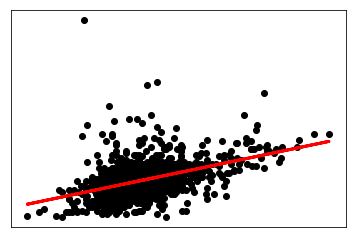

In [42]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
regr = linear_model.LinearRegression()
#x=df_new[(pd.isnull(df_new['TSH'])==False) & (pd.isnull(df_new['TT4'])==False)][['TSH','TT4']]
x=df_new[(pd.isnull(df_new['TSH'])==False) & (pd.isnull(df_new['TT4'])==False)& (pd.isnull(df_new['T3'])==False)& (pd.isnull(df_new['T4U'])==False)][['T4U']]
#x=x.values.reshape((-1,1))
y=df_new[(pd.isnull(df_new['TSH'])==False) & (pd.isnull(df_new['TT4'])==False)& (pd.isnull(df_new['T3'])==False)& (pd.isnull(df_new['T4U'])==False)][['T3']]
# Train the model using the training sets
regr.fit(x, y)

# Make predictions using the testing set
y_pred = regr.predict(x)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y, y_pred))

# Plot outputs
plt.scatter(x, y,  color='black')
plt.plot(x, y_pred, color='red', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

## Conclusion

In this preprocessing stage we performed some cleansing/replacing techniques such as replacing using **mean/mode/mod linear regression**. It turns out that replacing by med is good at data that is skewed with outliers, by mean when you have normalized data and by mod when there are only a few unique values.
By removing some duplicates you can **loose some kind of information** so it is very important how to deal with it. We used **filling Nan values** from duplicated rows and it turned out as a very good step. 